In [ ]:
pip install contractions

In [ ]:
pip install emoji

In [ ]:
pip install unidecode

In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
import emoji
import matplotlib.pyplot as plt
import sklearn
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('stopwords');
nltk.download('punkt');
nltk.download('omw-1.4');
import contractions
import unidecode

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
import unidecode
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
raw_tweets = pd.read_csv('BalancedTwitterDataset.csv')
raw_tweets_test = pd.read_csv('TestTwitterData.csv')

In [ ]:
raw_tweets.head(10)

,Unnamed: 0,label,tweet
0,0,0,#sukhbir #badal announces more office-bearers ...
1,1,1,my family's horrible attack at #thegreenpalmc...
2,2,0,my boys ððððð #drunknights #dru...
3,3,0,father's day # i m really vry lucky to hav u...
4,4,1,smh i cant take these one sided standards
5,5,1,@user what do you think of #alexjones saying #...
6,6,1,smoke out the old year and new year at the sam...
7,7,1,(advanced value chain videos at ) #valuechain
8,8,1,"this. #treasonoustrump, unsatisfied with his #..."
9,9,0,#buffalo bull up: you will dominate your bul...


In [ ]:
len(raw_tweets)

4442

In [ ]:
sentiment = raw_tweets['label'].value_counts()
sentiment

1    2242
0    2200
Name: label, dtype: int64

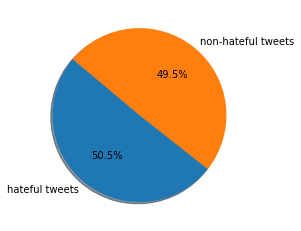

In [ ]:
plt.pie(sentiment,labels=["hateful tweets", "non-hateful tweets"], autopct="%1.1f%%", shadow=True, startangle=140);
plt.show();

In [ ]:
print(f'neutral tweets: {raw_tweets[raw_tweets.label==0].count()[0]}')
print(f'hateful tweets: {raw_tweets[raw_tweets.label==1].count()[0]}')

neutral tweets: 2200
hateful tweets: 2242


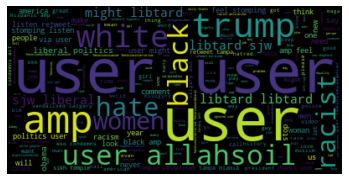

In [ ]:
hate_tweets = raw_tweets[raw_tweets['label']==1]
hate_text = "".join(hate_tweet.lower() for hate_tweet in hate_tweets['tweet'])
wordcloud = WordCloud().generate(hate_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### Remove RT (re-tweet) text from tweet if exists

In [ ]:
def remove_retweet(tweet):
    tweet = re.sub('RT\s+', '', tweet)
    return tweet   

Remove numbers from tweets

In [ ]:
def remove_numbers(tweet):
    return  re.sub(r'[0-9]+', '',tweet)

Remove greek characters

In [ ]:
def remove_greek(tweet):
    return unidecode.unidecode(tweet)

##### Remove user tag @user

In [ ]:
def remove_user_tag(tweet):
    tweet = re.sub('\B@\w+', '', tweet)
    return tweet 

##### Decode emojis if any

In [ ]:
def decode_emoji(tweet):
    tweet = emoji.demojize(tweet)
    return tweet

##### Remove URL

In [ ]:
def remove_url(tweet):
    tweet = re.sub('(http|https):\/\/\S+', '', tweet)
    return tweet 

##### Remove hashtags

In [ ]:
def remove_hashtag(tweet):
    tweet = re.sub(r'#+', '', tweet)
    return tweet 

##### Handling word features

In [ ]:
# Change all words to lowercase

def to_lowercase(tweet):
    tweet = tweet.lower()
    return tweet

In [ ]:
# Remove special characters

def remove_special_char(tweet):
    tweet = re.sub(r'[^A-Za-z]+\s?', ' ', tweet)
    return tweet

In [ ]:
# Remove words with two or less characters

def remove_short_char(tweet):
    tweet = re.sub(r'\b\w{1,2}\b', ' ', tweet)
    return tweet

##### Word contractions

In [ ]:
def contraction_expand(tweet):
    tweet = contractions.fix(tweet)
    return tweet

##### Checking for stop words

In [ ]:
stop_words = set(nltk.corpus.stopwords.words('english'))

In [ ]:
def tokenize_tweet(tweet):
  
  token_list = word_tokenize(tweet)
  stopwords = nltk.corpus.stopwords.words('english')

  # adding twitter specific stop words  
  new_stopwords = ["amp", "sm1", 'smh', 'idk', 'idc', 'lol', 'lmao', 'btw', 'fml', 'fyi', 'ftw', 'ftl', 'icymi', 'mtf'
                  ,'tbh', 'tbt', 'wtv', 'might', 'new']
  stopwords.extend(new_stopwords)
  token_list = [token for token in token_list if not token in stopwords]

  return token_list

##### Lemmatization

In [ ]:
def lemmatize_tweets(tokens,lemmatizer):
  token_list = []
  for token in tokens:
    token_list.append(lemmatizer.lemmatize(token))
  return token_list

##### Tweet pre-processing

In [ ]:
def preprocess_tweet(tweet):
  
  # Cleaning tweets
  tweet = remove_retweet(tweet) 
  tweet=remove_numbers(tweet)
  tweet=remove_greek(tweet)
  tweet = remove_user_tag(tweet)
  tweet = remove_url(tweet)
  tweet = remove_hashtag(tweet)  
  tweet = decode_emoji(tweet)
  
  # Handling word-features
  tweet = to_lowercase(tweet)
  tweet = contraction_expand(tweet) 
  tweet = remove_special_char(tweet)
  tweet = remove_short_char(tweet)  
  
  # Tokenizing & Lemmatizing
  tokens = tokenize_tweet(tweet) 
  tweet_lemmatizer = WordNetLemmatizer();
  lemma = lemmatize_tweets(tokens, tweet_lemmatizer) 
    
  return lemma

In [ ]:
raw_tweets["tokens"] = raw_tweets["tweet"].apply(preprocess_tweet) 
raw_tweets_test["tokens"] = raw_tweets_test["tweet"].apply(preprocess_tweet) 

In [ ]:
def clean_tweets(tokenlist):
     return ' '.join(tokenlist)
    

In [ ]:
raw_tweets['clean_tweet']=raw_tweets["tokens"].apply(clean_tweets)

In [ ]:
clean_tweets=raw_tweets

In [ ]:
def clean_tweets_test(tokenlist):
     return ' '.join(tokenlist)

In [ ]:
raw_tweets_test['clean_tweet']=raw_tweets_test["tokens"].apply(clean_tweets_test)

In [ ]:
clean_tweets_test=raw_tweets_test

### Text vectorization

##### Term Frequency | Inverse Document Frequency Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#Y is the outcome and X the input tweets for training
X=clean_tweets['clean_tweet']
Y=clean_tweets['label']

In [ ]:
td = TfidfVectorizer(max_features = 6000)
X = td.fit_transform(X).toarray()

In [ ]:
#Y is the outcome and X the input tweets for training
X_test=clean_tweets_test['clean_tweet']
Y_test=clean_tweets_test['label']

In [ ]:
td = TfidfVectorizer(max_features = 6000)
X_test = td.fit_transform(X_test).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0, shuffle = True, stratify=clean_tweets['label'])
vectorizer = TfidfVectorizer()


In [ ]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
predict_log = log_reg.predict(X_test)
accuracy_score(Y_test, predict_log)

0.8642160540135033

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, predict_log)

array([[579,  81],
       [100, 573]])

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, Y_train, cv=3)
log_reg_mean = log_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg'], 
    'Crossval Mean Scores': [log_reg_mean]}

result_df = pd.DataFrame(data=d)
result_df


,Classifiers,Crossval Mean Scores
0,Logistic Reg,0.862977


In [ ]:
log_reg.fit(X_train, Y_train)
#predict_log = log_reg.predict(X_test, threshold = 0.4)
decisions = (log_reg.predict_proba(X_test) >= 0.5).astype(int)
#accuracy_score(y_test, predict_log)

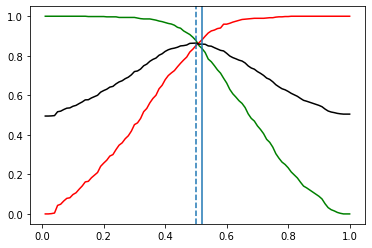

In [ ]:
tp = []
tn = []
overall_acc = []
for i in range(100):
    threshold = (i+1)/100
    decisions = (log_reg.predict_proba(X_test) >= threshold).astype(int)
    p = []
    for j in range(len(Y_test)):
        p.append(1 - decisions[j][0])
    conf = confusion_matrix(Y_test,p)
    tp.append(conf[0][0]/(conf[0][0] + conf[0][1]))
    tn.append(conf[1][1]/(conf[1][1] + conf[1][0]))
    overall_acc.append((conf[0][0] + conf[1][1])/len(Y_test))
import matplotlib.pyplot as plt
import numpy as np
thresh = list(np.linspace(0.01,1,100))
plt.plot(thresh,tp,color='green')
plt.plot(thresh, tn, color='red')
plt.plot(thresh, overall_acc, color='black')
plt.axvline(0.52)
plt.axvline(0.5, linestyle='dashed')